# BUSINESS UNDERSTANDING.
## 1.1 Overview
The core of modern communication is built of telecommunications businesses, which offer a variety of services like phone, data, internet, and video communication. As there is more digitalized development in the society, longevity in tech infrastructure is essential for smooth communication and economic stability. There are, however, major challenges in the telecommunications industry that require strategic solutions. One of the major issues is `customer churn`, where customers stop using a product or switch from one service provider to another. High churn rates impact revenue and customer satisfaction. A way to reduce churn is by enhancing customer service by, for example; improving service quality and personalizing services through data analytics. The metric of success of the model should be an accuracy score of 80%. In conclusion, Telecommunications firms can thrive in this developing setting by embracing innovation, making wise investments, and maintaining a high priority on customer satisfaction.

## 1.2 Business Problem
I have been tasked by SyriaTel, a telecommunications company, to identify patterns and factors that will enable them to anticipate customer behavior and take proactive steps to reduce churn rates. For this analysis, I'm leveraging data from the SyriaTel dataset that contains data on customers' usage patters and services information. As a result of the predictive analysis, the firm will be able to retain their clients. Overall, SyriaTel is looking to obtain predictive machine learning models that can predict whether customers are likely to churn or not.

## 1.3 Objectives
1.To build machine learning models that will predict how likely a customer will churn by analyzing customer features.

2.To identify the specific features that influence the rate of customer churn.

3.To determine the most accurate model in predicting the classification of churn/non-churn customers.


# DATA UNDERSTANDING.
This project analysis uses previous customer data from SyriaTel telecommunications company, which contains customer and service information.

The dataset is in CSV format downloaded from this source; https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

In [1]:
# load the dataset
# read the csv file

import pandas as pd

telecom_df= pd.read_csv("Syriatel-data.csv")
telecom_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


The dataset contains 3333 rows and 21 columns which include:

`demographic data` like state, area code

`customer usage patterns` like total day calls, total day minutes

`service information` like total day charge

The column titles are as follows:

- State: The state where the customer resides.

- Account length: The number of days that this account has been active.

- Area code: The area code associated with the customer's phone number.

- Phone number: The customer's phone number.

- International plan: A binary variable indicating whether the customer has an international calling plan (1) or not (0).

- Voice mail plan: A binary variable indicating whether the customer has a voicemail plan (1) or not (0).

- Number vmail messages: The number of voicemail messages the customer has.

- Total day minutes: The total number of minutes the customer used during the daytime.

- Total day calls: The total number of calls the customer made or received during the daytime.

- Total day charge: The total charges incurred by the customer for daytime usage.

- Total eve minutes: The total number of minutes the customer used during the evening.

- Total eve calls: The total number of calls the customer made or received during the evening.

- Total eve charge: The total charges incurred by the customer for evening usage.

- Total night minutes: The total number of minutes the customer used during the night.

- Total night calls: The total number of calls the customer made or received during the night.

- Total night charge: The total charges incurred by the customer for night usage.

- Total intl minutes: The total number of minutes the customer used for international calls.

- Total intl calls: The total number of international calls the customer made.

- Total intl charge: The total charges incurred by the customer for international calls.

- Customer service calls: The number of customer service calls made by the customer.

- Churn: A binary variable indicating whether the customer has churned (1) or not (0).

`Target variable`:churn

# DATA CLEANING.

In [119]:
#import all the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve



#import warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#view the first 5 rows of the dataset
telecom_df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# get information on the dataset
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The data types of the columns indicate that most features are represented as integers or floats, while a few are categorical variables (object), such as 'state', 'international plan', and 'voice mail plan'. The 'churn' column is a boolean variable, representing whether a customer has churned (True) or not (False).

In [6]:
telecom_df.shape

(3333, 21)

The shape of the dataset is 3333 rows and 21 columns(features)

In [7]:
#statistical information on the dataset
telecom_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


A statistical summary of the dataset shows that:

- The average account length of a customer is 101 with a standard deviation of 39.82.

- The average number of voice mail messages for a customers is 8.09 with a spread of 13.68. The highest number of voice mail messages by a customer is 51 while the least is 0.

- The average total day minutes for a customer is 179 with a spread of 54.46. The highest total day minutes by a customer is 350 while the least being 0.

- The average total day charge for a customer is 30 with a spread of 9.25. The highest total day charge by a customer is 165 while the least being 0.

In [8]:
#check for missing values
telecom_df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

From the above, it clear that there are no missing values thus the dataset contains no null values and is complete.

In [9]:
#check for duplicates
telecom_df.duplicated().value_counts()

False    3333
Name: count, dtype: int64

The dataset contains no duplicates.

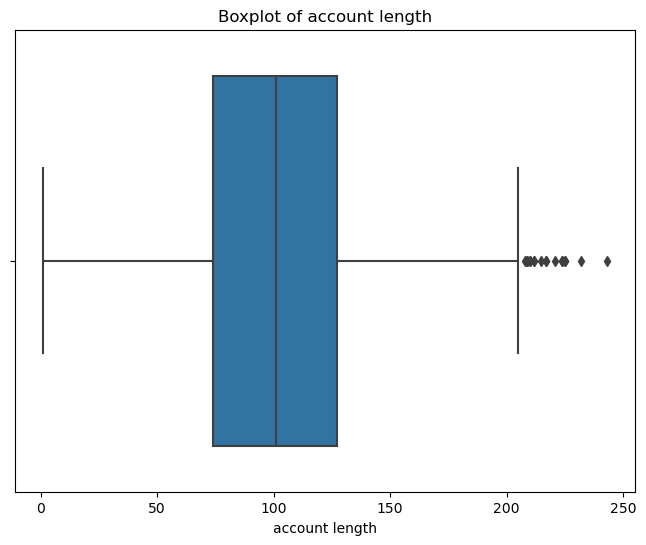

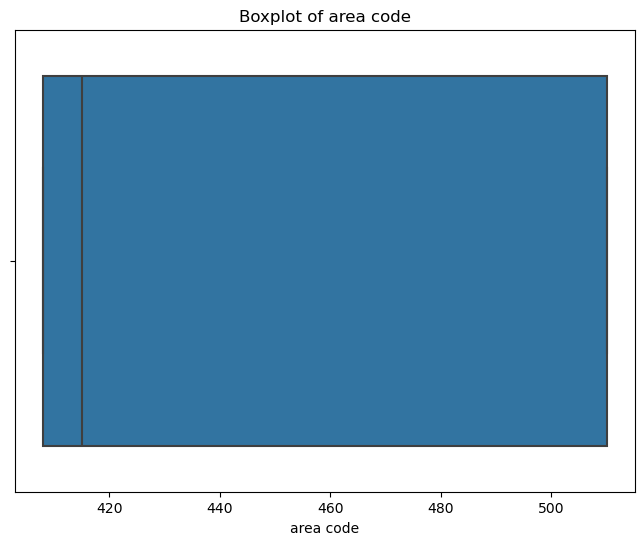

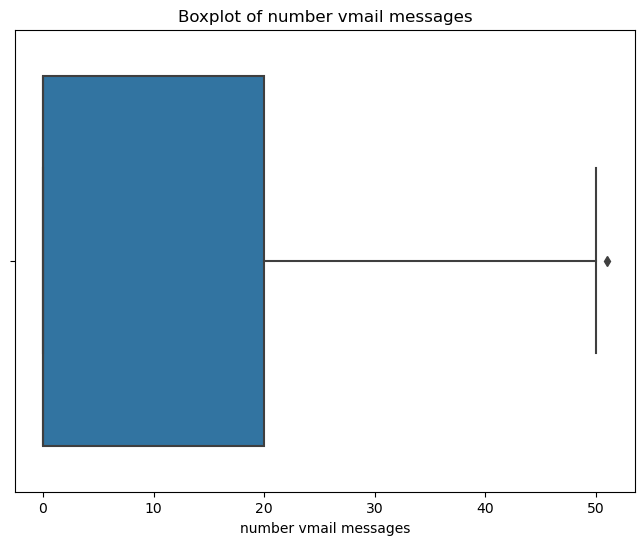

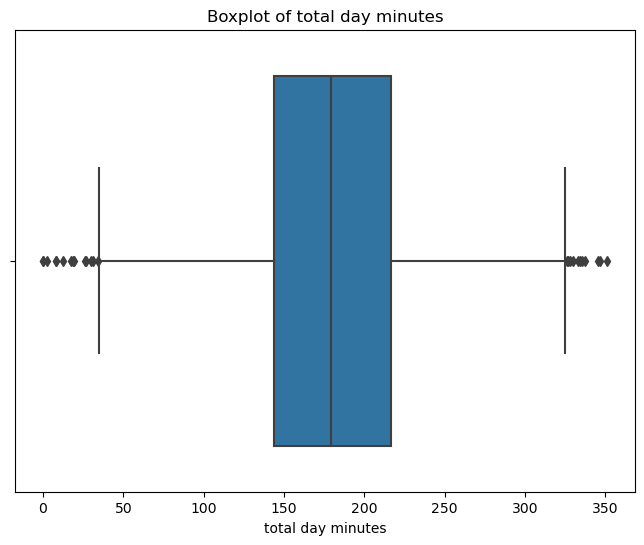

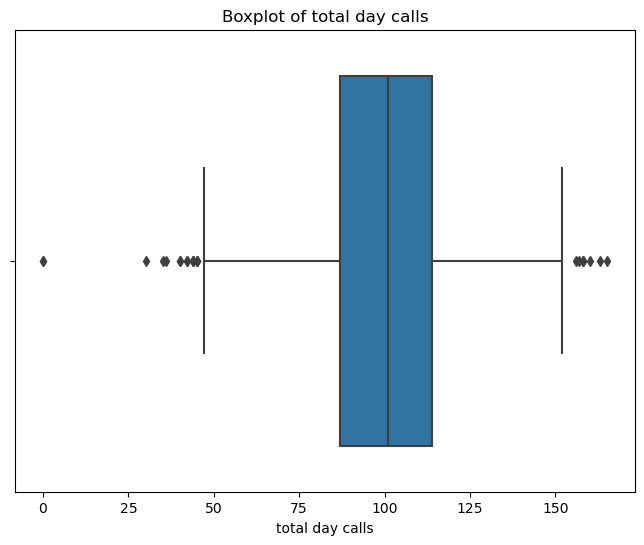

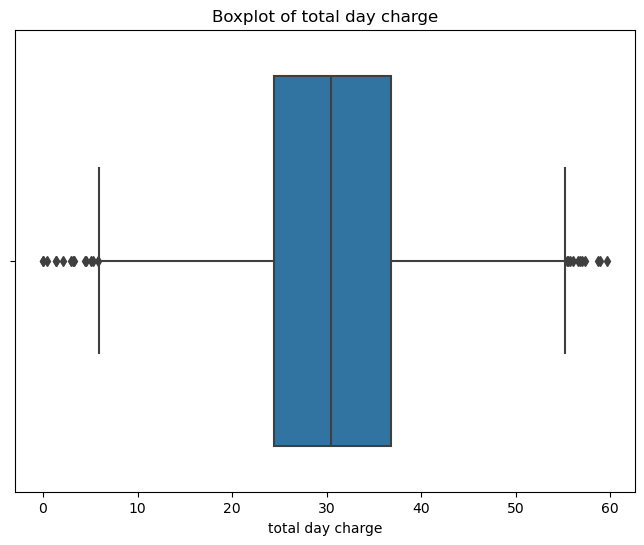

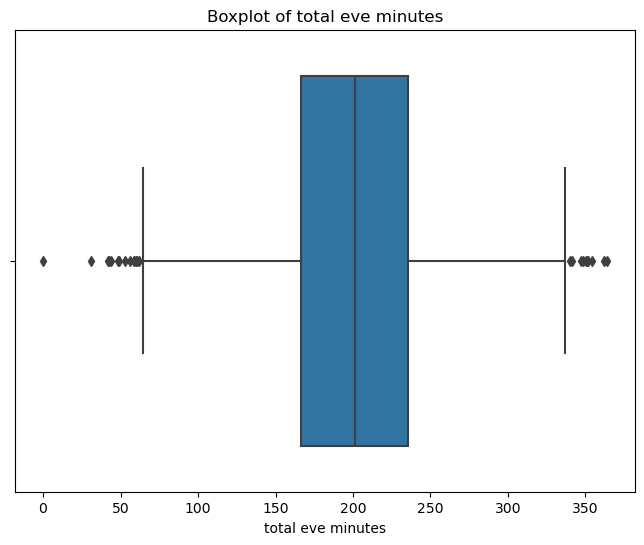

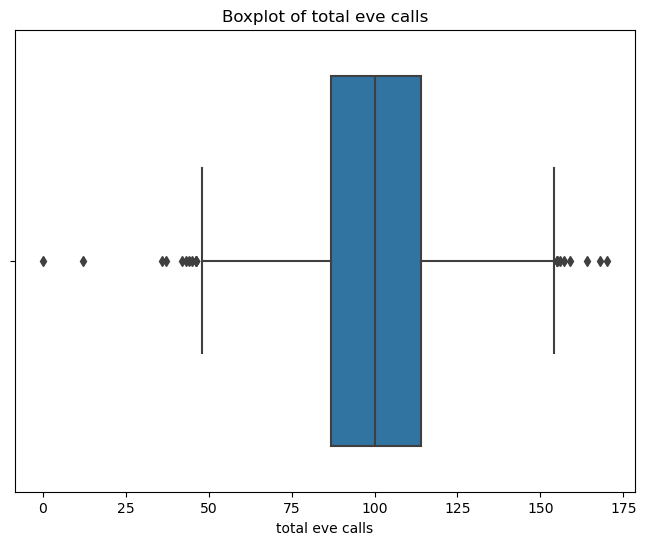

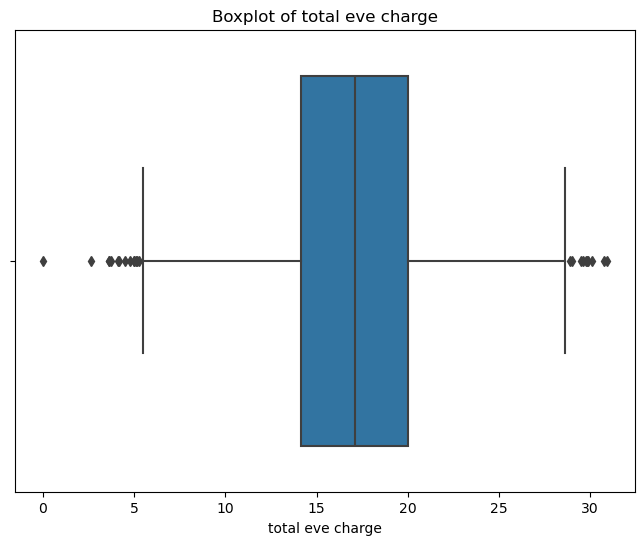

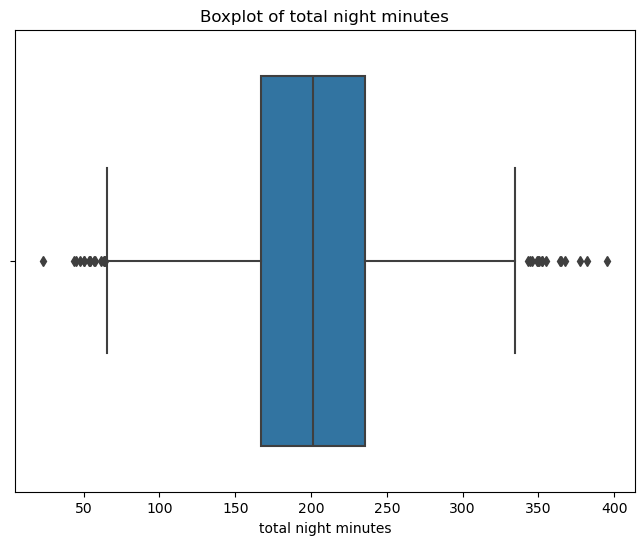

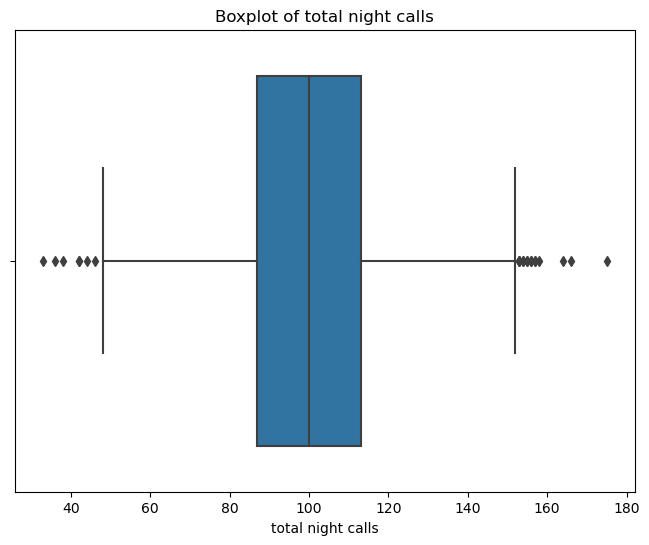

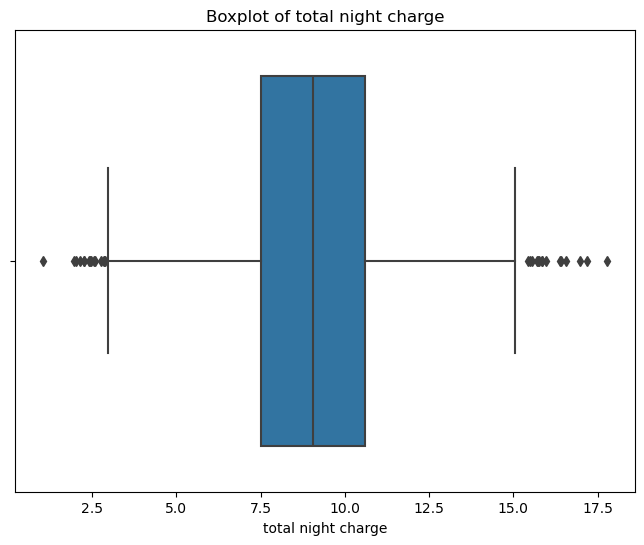

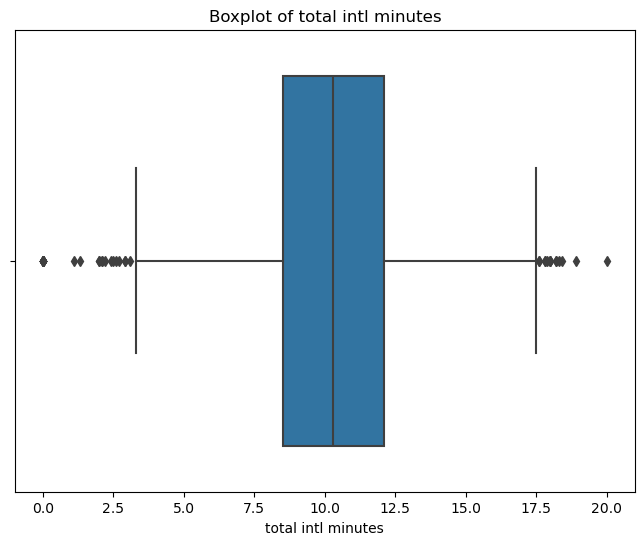

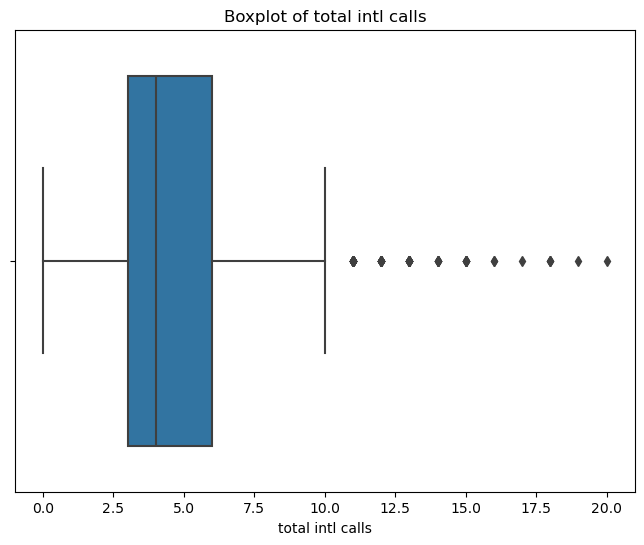

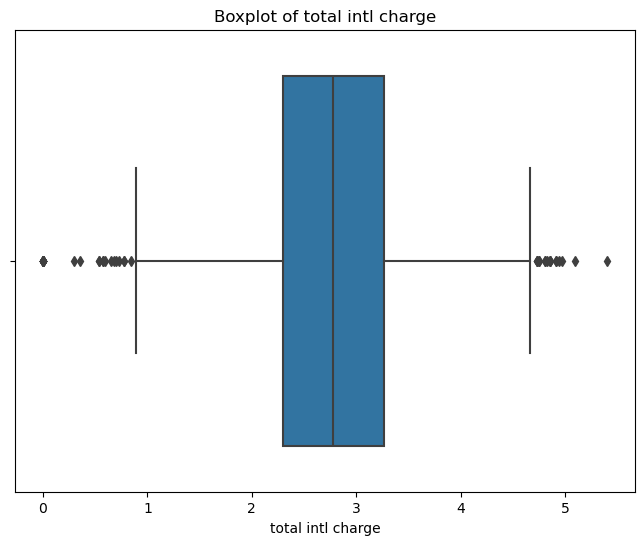

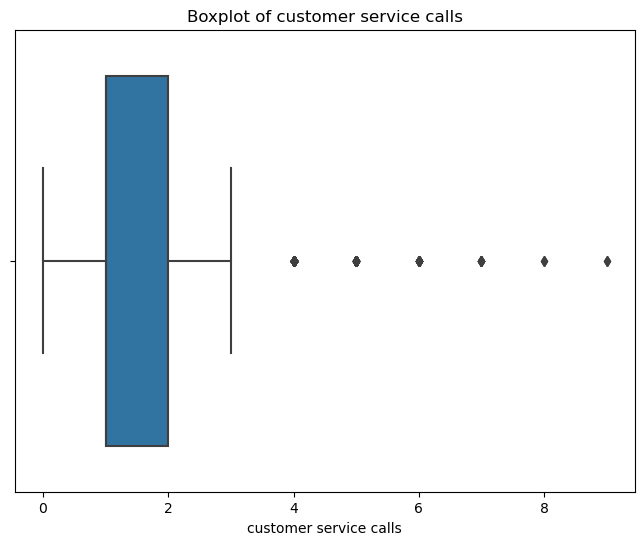

In [10]:
#check for outliers
numeric_columns = telecom_df.select_dtypes(include = 'number').columns

#plot boxplots for each numeric feature
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x = telecom_df[column])
    plt.xlabel(column)
    plt.title(f'Boxplot of {column}')
    plt.show()

Overall, the boxplot analysis reveals outliers in the Account Length, Number of Voicemail Messages, and Customer Service Calls variables. Specifically;

- `Account Length, Number of Voicemail Messages, and Customer Service Calls`: These variables have outliers indicated by individual data points outside the whiskers. The presence of outliers suggests that some customers have account lengths, voicemail message counts, or customer service calls that deviate significantly from the majority.

- `Total Day Minutes, Total Eve Minutes, Total Night Minutes, Total Intl Minutes, Total Day Charge, Total Eve Charge, Total Night Charge, and Total Intl Charge`: These variables do not have any visible outliers. The distribution of values within the boxes is relatively compact and there are no data points outside the whiskers.

- `Total Day Calls, Total Eve Calls, Total Night Calls, and Total Intl Calls`: These variables do not have any visible outliers. The boxplots show a fairly symmetrical distribution without any extreme values.

# DATA ANALYSIS.
### 1.1 UNIVARIATE ANALYSIS
The purpose of univariate analysis is to understand the characteristics and distribution of each single variable.

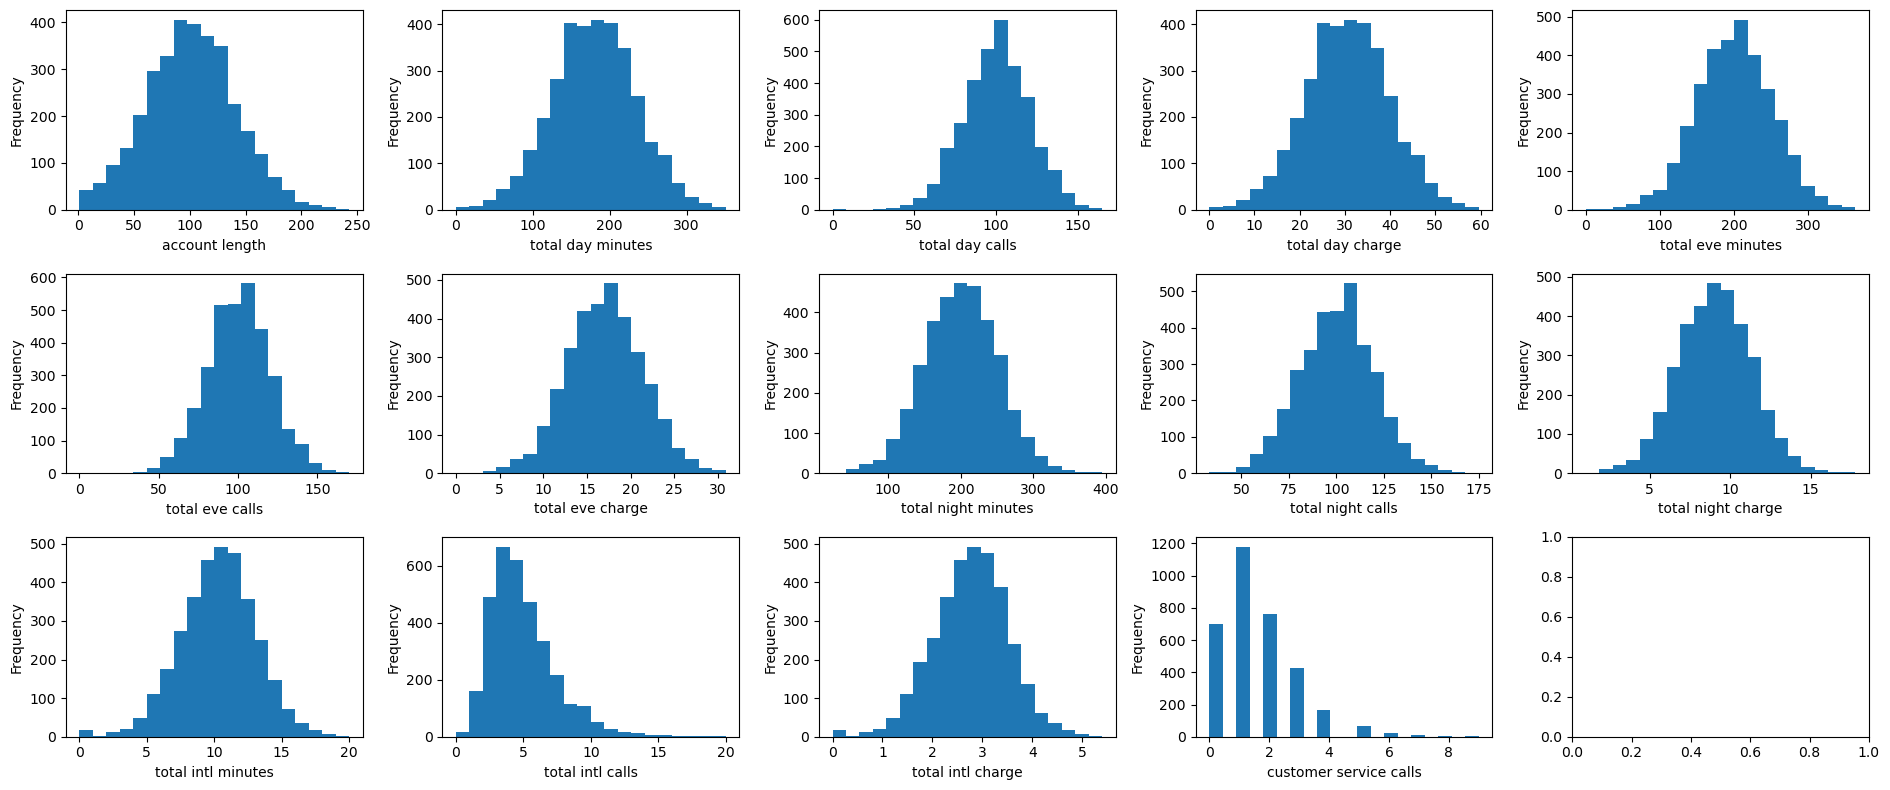

In [11]:
#plot the distribution of each numerical feature
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(19, 8))
variables = ['account length', 'total day minutes', 'total day calls', 'total day charge',
             'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes',
             'total night calls', 'total night charge', 'total intl minutes', 'total intl calls',
             'total intl charge', 'customer service calls']

for i, variable in enumerate(variables):
    ax = axes[i // 5, i % 5]
    ax.hist(telecom_df[variable], bins=20)
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Most of the features are normally distributed except for `total intl calls` and `customer service calls` which are left skewed. Also, most variables exhibit no major issues such as missing values or outliers.

In specifics;

- `Account Length`: The distribution appears to be roughly symmetrical, with a peak around 100. There is no noticeable skewness or outliers.

- `Total Day Minutes, Total Eve Minutes, Total Night Minutes, and Total Intl Minutes`: The distributions for these variables are roughly normal, with no significant skewness or outliers.

- `Total Day Calls, Total Eve Calls and  Total Night Calls`: The distributions for these variables show no clear patterns and appear to be relatively evenly distributed.

- `Total Day Charge, Total Eve Charge, Total Night Charge, and Total Intl Charge`: The distributions for these variables are similar to their respective minute counterparts, as expected since charges are calculated based on minutes. There are no significant deviations or outliers.

- `Customer Service Calls`: The majority of customers have made one or two customer service calls. The distribution is left skewed.

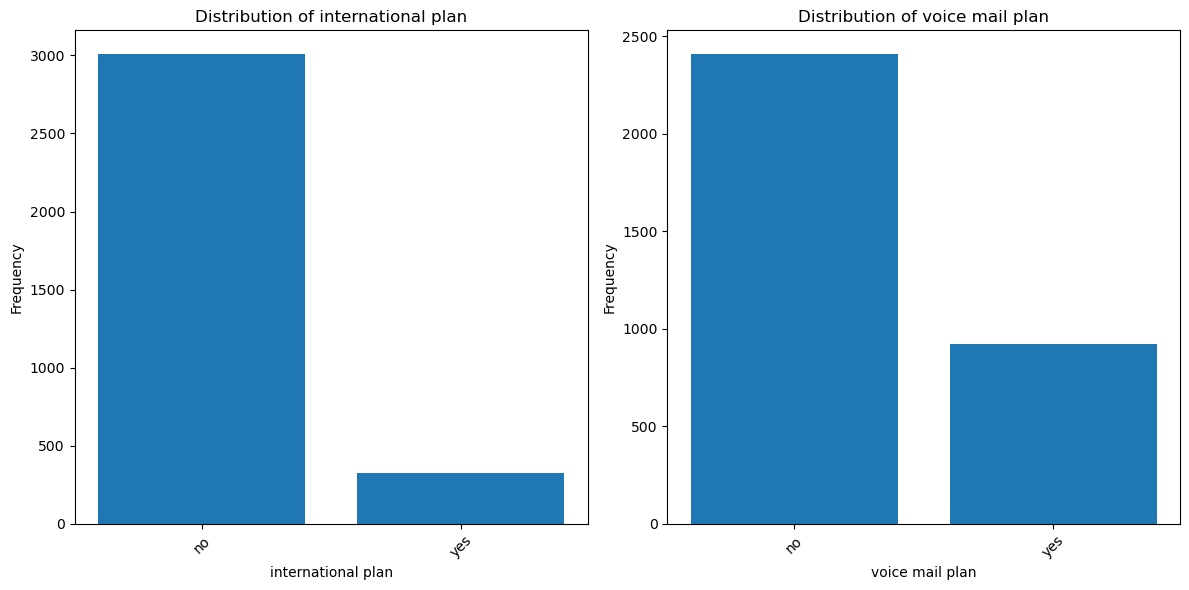

In [12]:
#plot bar plots for categorical variables to show their distributions

#select categorical columns excluding 'state' and 'phone number'
categorical_vars = telecom_df.select_dtypes(include=['object']).columns.drop(['state', 'phone number'])

#set the number of rows and columns for the subplots
num_rows = 1
num_cols = len(categorical_vars)

#set the figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

#plot bar plots for each categorical variable
for i, var in enumerate(categorical_vars):
    axes[i].bar(telecom_df[var].value_counts().index, telecom_df[var].value_counts())
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title('Distribution of ' + var)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

From the bar plot analysis:

- `International Plan`: The majority of customers do not have an international plan, while a smaller proportion has an international plan. The distribution is imbalanced, with a significantly higher frequency for the "no" category.

- `Voice Mail Plan`: Similarly, most customers do not have a voice mail plan, while a smaller portion has a voice mail plan. The distribution is also imbalanced, with a higher frequency for the "no" category.

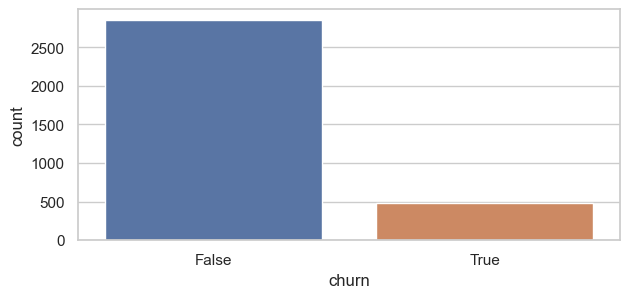

In [13]:
#plot a bar plot for the target variable('churn')
sns.set_theme(style="whitegrid")
plt.figure(figsize =(7,3))
sns.countplot(data=telecom_df, x='churn');

The bar plot provides a visual representation of the distribution of the target variable(churn), pointing out the class imbalance between churned and non-churned customers in the dataset. It shows that the number of customers who have not churned is significantly higher than the number of customers who have churned. This indicates an imbalance in the target variable, where the majority of customers have not churned.

### 1.2 BIVARIATE ANALYSIS
The purpose of bivariate analysis is to understand and quantify the association, correlation, or causation between the variables.

a) I will use scatter plots to visualize the relationship between the target variable 'churn' and each numerical variable in the dataset.

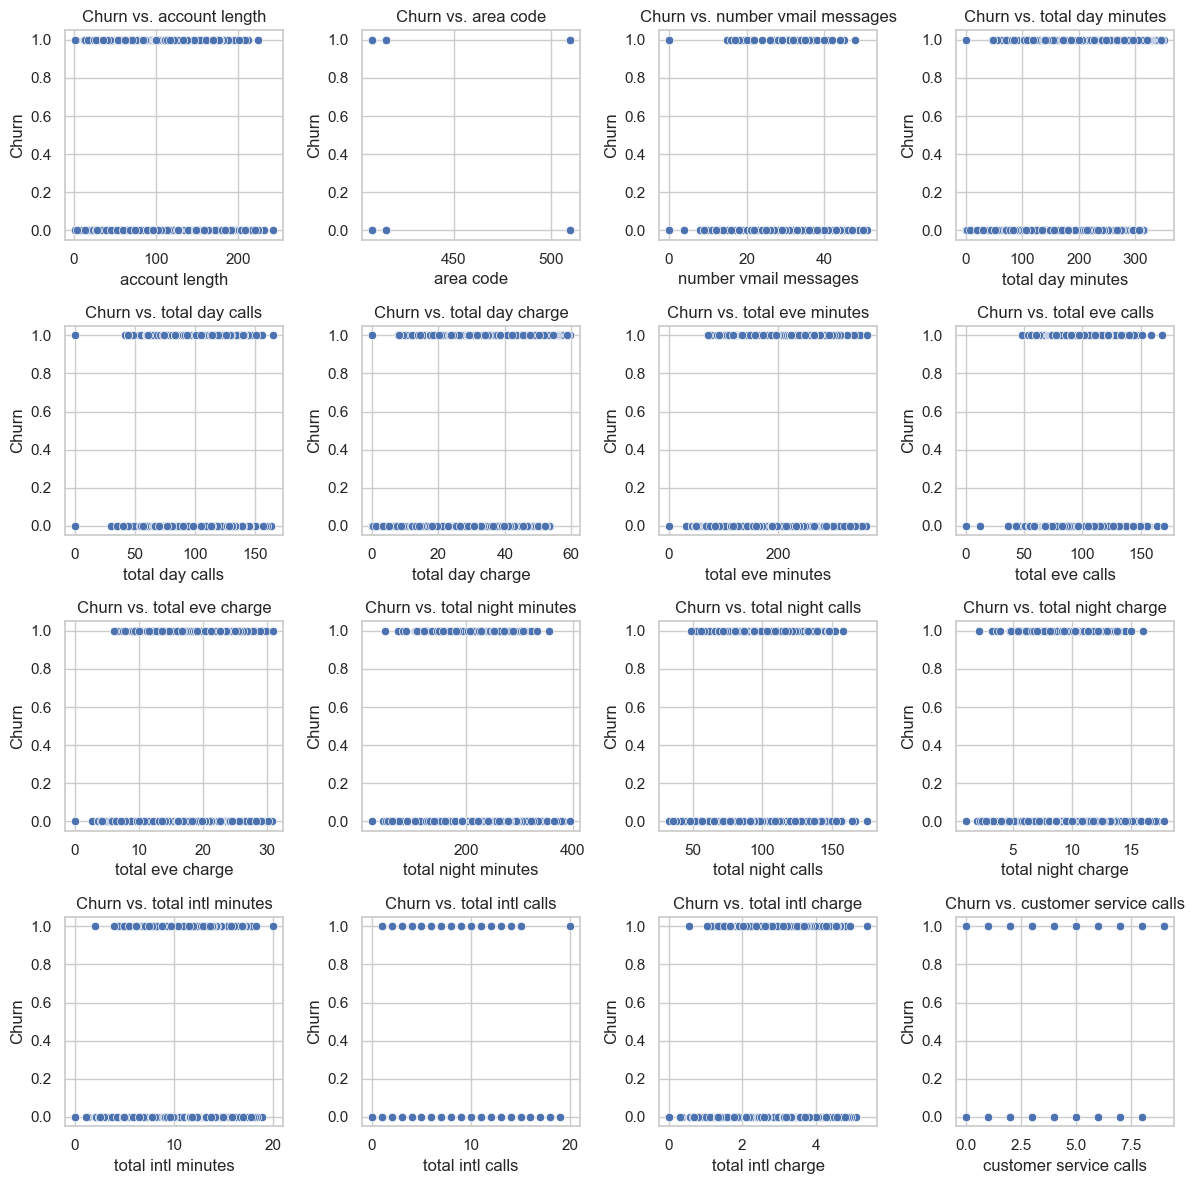

In [14]:
#plot scatter plots to show the relationship between churn and the numerical variables

#select numerical columns
numerical_vars = telecom_df.select_dtypes(include=['int64', 'float64']).columns

#set the number of rows and columns for the subplots
num_rows = 4
num_cols = -(-len(numerical_vars) // num_rows) 

#set the figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

#plot scatter plots for each numerical variable against other numerical variables
for i, var in enumerate(numerical_vars):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=var, y='churn', data=telecom_df, ax=axes[row, col])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Churn')
    axes[row, col].set_title('Churn vs. ' + var)

plt.tight_layout()
plt.show()

The specifics;

- `Account Length vs. Churn`: There isn't a clear linear relationship between account length and churn. The scatter plot shows a random distribution of churned and non-churned customers across different account lengths.

- `Number of Voicemail Messages vs. Churn`: There is no apparent linear relationship between the number of voicemail messages and churn. The scatter plot indicates that both churned and non-churned customers have varying numbers of voicemail messages.

- `Total Day Minutes vs. Churn`: Customers with higher total day minutes are more likely to churn. There seems to be a higher concentration of churned customers with higher total day minutes compared to non-churned customers.

- `Total Day Calls vs. Churn`: There is no distinct relationship between the total number of day calls and churn. The scatter plot shows a scattered distribution of churned and non-churned customers across different total day call counts.

- `Total Day Charge vs. Churn`: Customers with higher total day charges have a higher likelihood of churn. The scatter plot indicates that churned customers tend to have higher total day charges compared to non-churned customers.

- `Total Eve Minutes, Total Eve Calls, and Total Eve Charge vs. Churn`: The scatter plots for these variables show no clear relationship with churn. The distribution of churned and non-churned customers appears to be random across different values of total eve minutes, total eve calls, and total eve charges.

- `Total Night Minutes, Total Night Calls, and Total Night Charge vs. Churn`: Similar to the previous variables, there is no clear relationship between these nighttime variables and churn. The scatter plots display a scattered distribution of churned and non-churned customers.

- `Total Intl Minutes, Total Intl Calls, and Total Intl Charge vs. Churn`: The scatter plots for these international variables also show no clear relationship with churn. The distribution of churned and non-churned customers appears random across different values of total intl minutes, total intl calls, and total intl charges.

b) I will use bar plots to visualize the relationship between the target variable 'churn' and each categorical variable in the dataset.

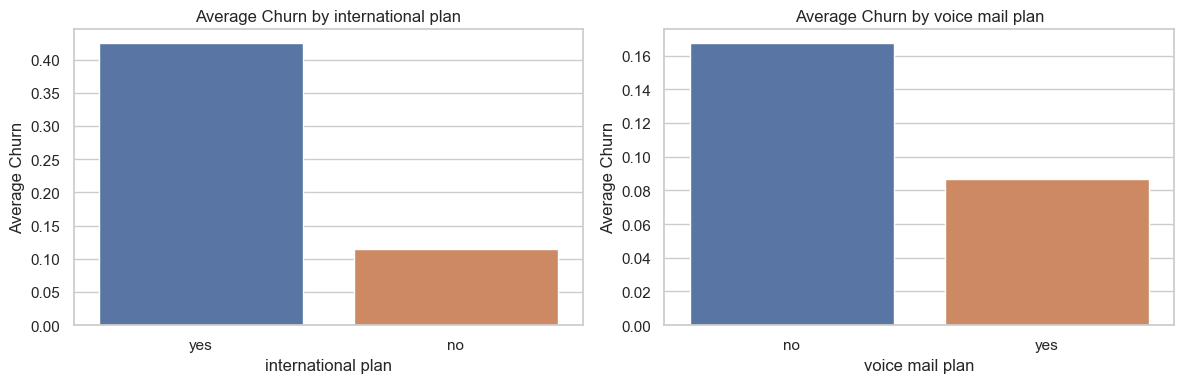

In [15]:
#plot bar plots to show relationship of churn and categorical variables

#define the columns
columns = ['international plan', 'voice mail plan']

#create bar plots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 4))

#generate bar plots for each column
for i, column in enumerate(columns):
    grouped_data = telecom_df.groupby(column)['churn'].mean().sort_values(ascending=False)
    sns.barplot(x=grouped_data.index, y=grouped_data.values, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average Churn')
    axes[i].set_title(f'Average Churn by {column}')


plt.tight_layout()
plt.show()

Specifics;

- `International Plan vs. Churn`: The bar plot shows the average churn rate based on whether a customer has an international plan or not. Customers who have an international plan tend to have a higher average churn rate compared to those who do not have an international plan. This indicates that having an international plan may be associated with a higher likelihood of churn.

- `Voice Mail Plan vs. Churn`: The bar plot displays the average churn rate based on whether a customer has a voice mail plan or not. Interestingly, customers who do not have a voice mail plan exhibit a slightly higher average churn rate compared to those who have a voice mail plan. This suggests that the presence of a voice mail plan may have a slight positive impact on customer retention.

The Bivariate Analysis has considered the 4 features against 'churn'

- account length
- total day minutes
- total eve minutes
- total night minutes

c) I will use a heat map to check for multicollinearity amongst the variables in the dataset.

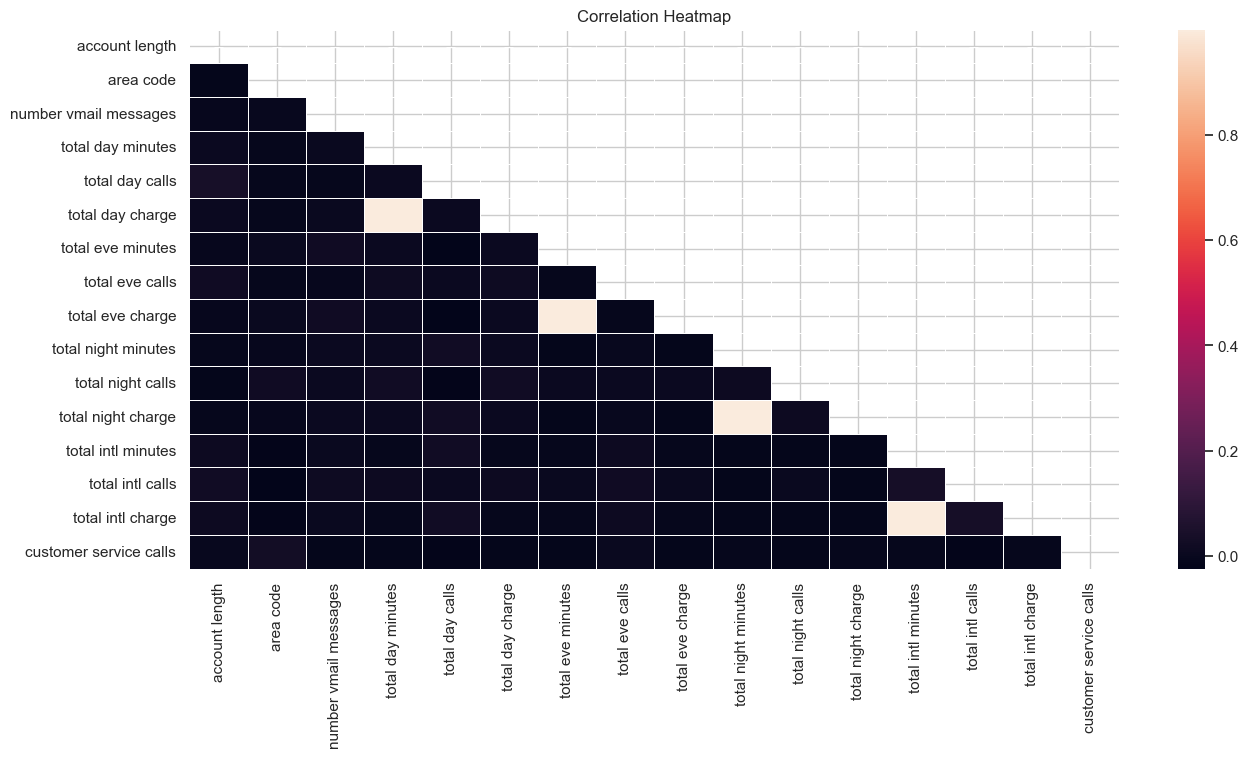

In [16]:
#select the numerical columns
numeric_columns = telecom_df.select_dtypes(include=np.number)

#create a heatmap for the numeric features
fig, ax = plt.subplots(figsize=(15, 7))

#generate a mask for the upper triangle
mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))
sns.heatmap(numeric_columns.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax, mask=mask)

plt.title('Correlation Heatmap')
plt.show()

In conclusion;

- `Positive correlation`: The features total day minutes, total day charge, total evening minutes, total evening charge, total international minutes, and customer service calls have a positive correlation with 'churn'.

- `Negative correlation`: The Number of voice mail messages and total international calls has a negative correlation with 'churn'.

- The other variables: account length, area code, total day calls, total evening calls', total night minutes, total night calls, total night charge, 'total international calls, total international charge have correlation coefficients close to zero indicating a `weak or negligible` relationship between these variables and 'churn'.

In [20]:
#drop one the highly correlated columns in the pair
df_new = telecom_df.drop(["total day minutes", "total eve minutes", "total night minutes", "total intl minutes"], axis=1)
df_new.shape

(3333, 17)

#### encoding

In [22]:
# Binary Encoding the Target Column
telecom_df['churn'] = telecom_df['churn'].replace({True: 1, False: 0}).astype(int)

# One-hot-encoding Area Code Column
# Area code
telecom_df = pd.get_dummies(telecom_df, columns=['area code'], drop_first=True)

# Binary-encoding the other categorical columns
# Voicemail
telecom_df['voice mail plan'] = telecom_df['voice mail plan'].map({'yes': 1, 'no': 0})

# International Plan
telecom_df['international plan'] = telecom_df['international plan'].map({'yes': 1, 'no': 0})

# MODELING.


In [89]:
#view the 'before'
telecom_df.shape

(3333, 22)

In [79]:
# determine the features(X) and target feature(y)
X = df_new.drop(['churn','phone number','state'], axis=1)
y = df_new['churn']

# execute one-hot encoding on categorical features 
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()

,account length,area code,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes
0,128,415,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False,True
1,107,415,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False,True
2,137,415,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False,False
3,84,408,0,71,50.90,88,5.26,89,8.86,7,1.78,2,True,False
4,75,415,0,113,28.34,122,12.61,121,8.41,3,2.73,3,True,False


#### executing a train test split 

In [80]:
# Split the data into trainning set and testing set,assigned 30% to the test set and set the random_state to 132
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=132)


In [81]:
# display the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (2333, 14) (2333,)
Test set shape: (1000, 14) (1000,)


In [82]:
# Use SMOTE to solve imbalance issues
sm = SMOTE()

X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Check the shapes before and the shape after SMOTE
print("X_train Shape before oversampling: ", X_train.shape)
print("X_train Shape after oversampling: ", X_train_resampled.shape)
print("\n")
print("y_train Shape before oversampling: ", y_train.shape)
print("y_train Shape after oversampling: ", y_train_resampled.shape)

print("\n")
print(f"y_train Value Counts before oversampling: \n{pd.Series(y_train).value_counts()}")
print("\n")
print(f"y_train Value Counts after oversampling: \n{pd.Series(y_train_resampled).value_counts()}")

X_train Shape before oversampling:  (2333, 14)
X_train Shape after oversampling:  (4014, 14)


y_train Shape before oversampling:  (2333,)
y_train Shape after oversampling:  (4014,)


y_train Value Counts before oversampling: 
churn
False    2007
True      326
Name: count, dtype: int64


y_train Value Counts after oversampling: 
churn
False    2007
True     2007
Name: count, dtype: int64


#### feature scaling

In [83]:
# Scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [84]:
# Create a function for modeling
def modeling(model):
        
    X1 = X_train_scaled
    X2 = X_test_scaled
    y1 = y_train_resampled
    y2 = y_test
    
    base_cv = cross_val_score(model, X_train_scaled, y_train_resampled)
    
    fitting = model.fit(X1,y1)
    predicting = model.predict(X2)
    scoring = model.score(X2, y2)
    model_cv = cross_val_score(model, X1, y1, cv=6)
    model_report = classification_report(y2, predicting)
    model_roc_auc = roc_auc_score(y2, predicting)
    
    print("Score:")
    print("\t",scoring)
    print("\nCross validation:")
    print("\t",model_cv)
    print("\nClass report:")
    print(model_report)
    print("\nROC_AUC:")
    print("\t",model_roc_auc)

In [85]:
# Create a function for displaying Confusion Matrix
def conf_matrix(model):
    
    X1 = X_train_scaled
    X2 = X_test_scaled
    y1 = y_train_resampled
    y2 = y_test
    
    predicting = model.predict(X2)
    
    # Estimator confusion matrix
    dis_estimator = ConfusionMatrixDisplay.from_estimator(model, X1, y1)
    
    # Predictor confusion matrix
    dis_predictor = ConfusionMatrixDisplay.from_predictions(y2, predicting)
    
    return dis_estimator, dis_predictor

## Finding the most important features.

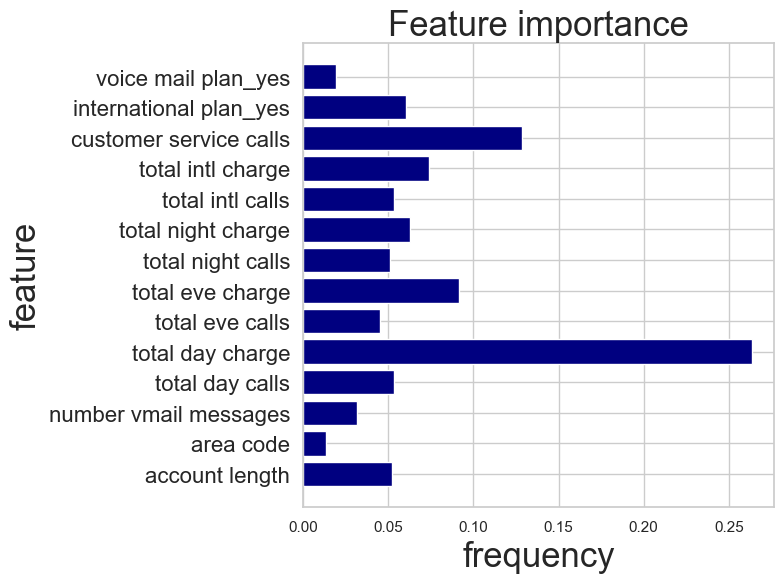

In [123]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Checking fro the most important features
def plot_important_features(model):
    number_features = X_test.shape[1]
    plt.figure(figsize=(8,6))
    plt.barh(range(number_features), model.feature_importances_, align='center',color='navy')
    plt.yticks(np.arange(number_features), X_test.columns.values, fontsize = 16)
    plt.xlabel('frequency', fontsize = 25)
    plt.ylabel('feature', fontsize = 25)
    plt.title('Feature importance', fontsize = 25)
    plt.tight_layout()
    
plot_important_features(clf)

The top features that influence the rate of customer churn are:
- total day charge
- international plan
- customer service calls
- area code

## Model 1: Logistic Regression Model

In [86]:
#find results from the Logistic Regression model
base_model = LogisticRegression(random_state=132)

modeling(base_model)


Score:
	 0.762

Cross validation:
	 [0.74887892 0.81763827 0.79521674 0.79970105 0.82361734 0.754858  ]

Class report:
              precision    recall  f1-score   support

       False       0.94      0.77      0.84       843
        True       0.37      0.73      0.49       157

    accuracy                           0.76      1000
   macro avg       0.65      0.75      0.67      1000
weighted avg       0.85      0.76      0.79      1000


ROC_AUC:
	 0.749990555417035


In [96]:
# list of cross-validation scores
cross_validation_scores = [0.74887892, 0.81763827, 0.79521674, 0.79970105, 0.82361734, 0.754858]

# calculate the mean of the cross-validation scores
mean_cross_validation_score = sum(cross_validation_scores) / len(cross_validation_scores)

print("Mean Cross-Validation Score:", mean_cross_validation_score)

Mean Cross-Validation Score: 0.7899850533333334


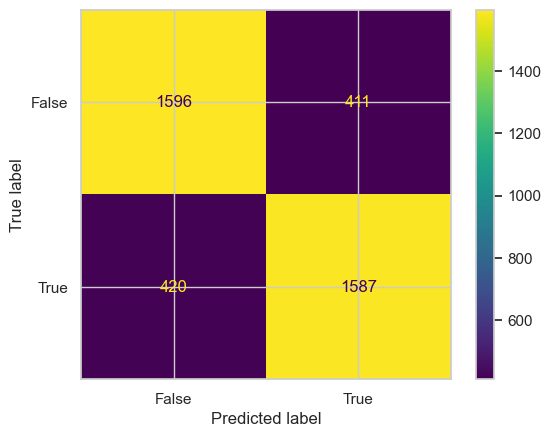

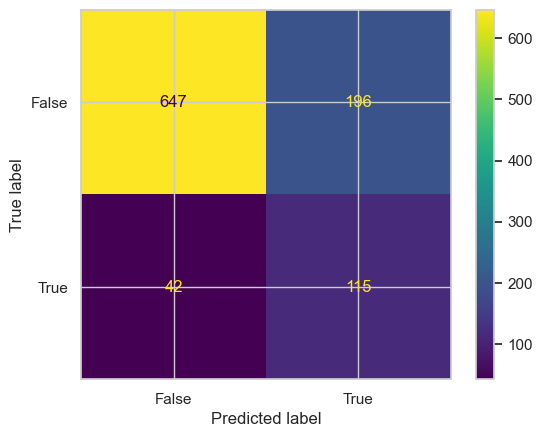

In [87]:
conf_matrix(base_model);

Based on the evaluation results of the logistic regression model, the conclusions are:

- `Cross-Validation Score`: The mean recall score obtained from 6-fold cross-validation is approximately 0.79. This indicates that, on average, the logistic regression model is able to correctly identify around 79.0% of the churned customers in the training data.

- `Accuracy`: The accuracy of the logistic regression model on the test set is approximately 0.76. This means that the model is able to correctly classify around 76.0% of the customers as either churned or not churned. 

- `Precision`: The precision of the logistic regression model is approximately 0.37. This indicates that when the model predicts a customer as churned, it is correct around 37.0% of the time. 

- `Recall`: The recall score of the logistic regression model is approximately 0.73. This means that the model is able to correctly identify around 73.0% of the churned customers in the test set. It represents the proportion of actual churned customers that were correctly identified by the model.

- `F1-score`: The F1-score of the logistic regression model is approximately 0.49.

## Model 2: Decision Tree Classifier


In [90]:
# find results from Decision Trees
tree = DecisionTreeClassifier(random_state=132, max_depth=5)

modeling(tree)

Score:
	 0.86

Cross validation:
	 [0.84603886 0.85500747 0.84603886 0.83707025 0.85351271 0.85650224]

Class report:
              precision    recall  f1-score   support

       False       0.97      0.86      0.91       843
        True       0.53      0.83      0.65       157

    accuracy                           0.86      1000
   macro avg       0.75      0.85      0.78      1000
weighted avg       0.90      0.86      0.87      1000


ROC_AUC:
	 0.84958179386631


In [98]:
# list of cross-validation scores
cross_validation_scores = [0.84603886, 0.85500747, 0.84603886, 0.83707025, 0.85351271, 0.85650224]

# calculate the mean of the cross-validation scores
mean_cross_validation_score = sum(cross_validation_scores) / len(cross_validation_scores)

print("Mean Cross-Validation Score:", mean_cross_validation_score)

Mean Cross-Validation Score: 0.8490283983333332


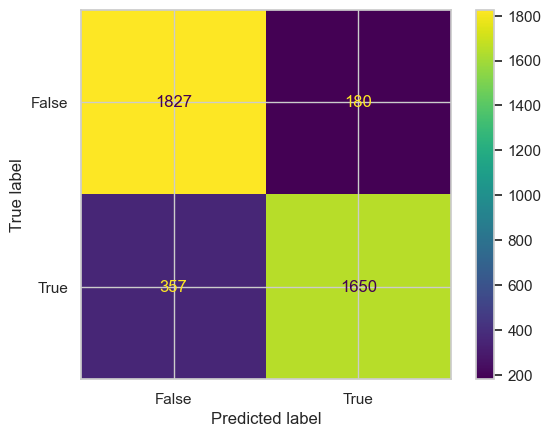

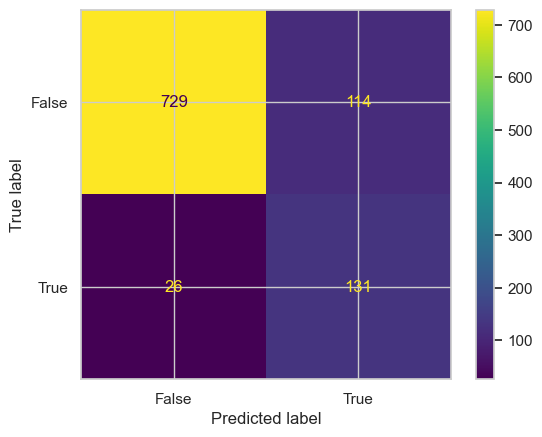

In [91]:
# display confusion matrices from estimators and predictors
conf_matrix(tree);

Based on the evaluation results of the decision tree classifier, the conclusions are:

- `Cross-Validation Score`: The mean recall score obtained from 6-fold cross-validation is approximately 0.85. This indicates that, on average, the decision tree classifier is able to correctly identify around 85.0% of the churned customers in the training data.

- `Accuracy`: The accuracy of the decision tree classifier on the test set is approximately 0.86. This means that the model is able to correctly classify around 86.0% of the customers as either churned or not churned.

- `Precision`: The precision of the decision tree classifier is approximately 0.53. This indicates that when the model predicts a customer as churned, it is correct around 53.0% of the time.

- `Recall`: The recall score of the decision tree classifier is approximately 0.83. This means that the model is able to correctly identify around 83.0% of the churned customers in the test set. It represents the proportion of actual churned customers that were correctly identified by the model.

- `F1-score`: The F1-score of the decision tree classifier is approximately 0.65.

## Model 3: Random Forest

In [92]:
# get results using Random Forest
clf = RandomForestClassifier(n_estimators=4, random_state=132)

modeling(clf)

Score:
	 0.879

Cross validation:
	 [0.85351271 0.88490284 0.87443946 0.88041854 0.90732436 0.877429  ]

Class report:
              precision    recall  f1-score   support

       False       0.92      0.93      0.93       843
        True       0.62      0.59      0.60       157

    accuracy                           0.88      1000
   macro avg       0.77      0.76      0.77      1000
weighted avg       0.88      0.88      0.88      1000


ROC_AUC:
	 0.7597789212019553


In [99]:
# list of cross-validation scores
cross_validation_scores = [0.85351271, 0.88490284, 0.87443946, 0.88041854, 0.90732436, 0.877429]

# calculate the mean of the cross-validation scores
mean_cross_validation_score = sum(cross_validation_scores) / len(cross_validation_scores)

print("Mean Cross-Validation Score:", mean_cross_validation_score)

Mean Cross-Validation Score: 0.8796711516666668


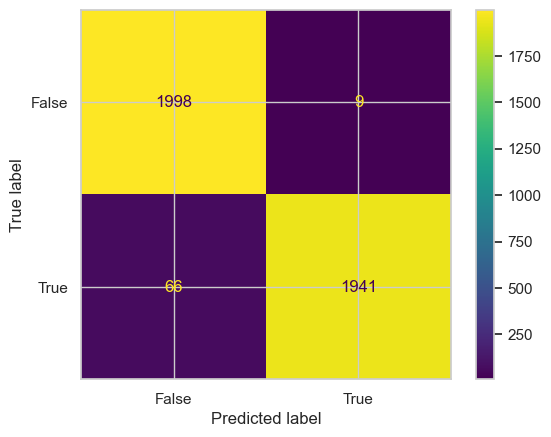

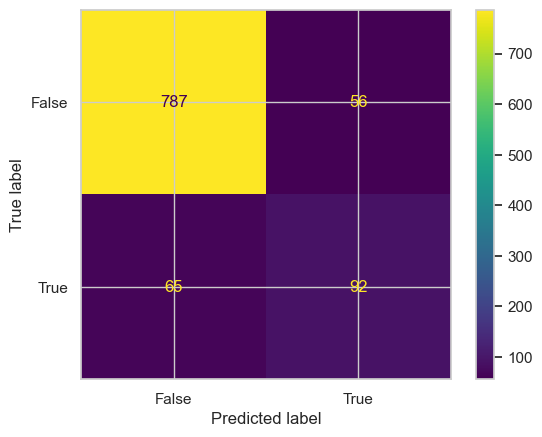

In [93]:
# display confusion matrices from estimators and predictors
conf_matrix(clf);

Based on the evaluation results of the random forest, the conclusions are:

- `Cross-Validation Score`: The mean recall score obtained from 6-fold cross-validation is approximately 0.87. This indicates that, on average, the random forest is able to correctly identify around 87.0% of the churned customers in the training data.

- `Accuracy`: The accuracy of the random forest on the test set is approximately 0.88. This means that the model is able to correctly classify around 88.0% of the customers as either churned or not churned.

- `Precision`: The precision of the random forest is approximately 0.62. This indicates that when the model predicts a customer as churned, it is correct around 62.0% of the time.

- `Recall`: The recall score of the random forest is approximately 0.59. This means that the model is able to correctly identify around 59.0% of the churned customers in the test set. It represents the proportion of actual churned customers that were correctly identified by the model.

- `F1-score`: The F1-score of the random forest is approximately 0.60.

## Model 4: KNN model

In [94]:
# get results using KNN
knn = KNeighborsClassifier(n_neighbors=4)

modeling(knn)

Score:
	 0.817

Cross validation:
	 [0.89237668 0.90134529 0.92227205 0.91180867 0.89835575 0.90284006]

Class report:
              precision    recall  f1-score   support

       False       0.92      0.86      0.89       843
        True       0.44      0.60      0.51       157

    accuracy                           0.82      1000
   macro avg       0.68      0.73      0.70      1000
weighted avg       0.84      0.82      0.83      1000


ROC_AUC:
	 0.7281886801006414


In [100]:
# list of cross-validation scores
cross_validation_scores = [0.89237668, 0.90134529, 0.92227205, 0.91180867, 0.89835575, 0.90284006]

# calculate the mean of the cross-validation scores
mean_cross_validation_score = sum(cross_validation_scores) / len(cross_validation_scores)

print("Mean Cross-Validation Score:", mean_cross_validation_score)

Mean Cross-Validation Score: 0.9048330833333335


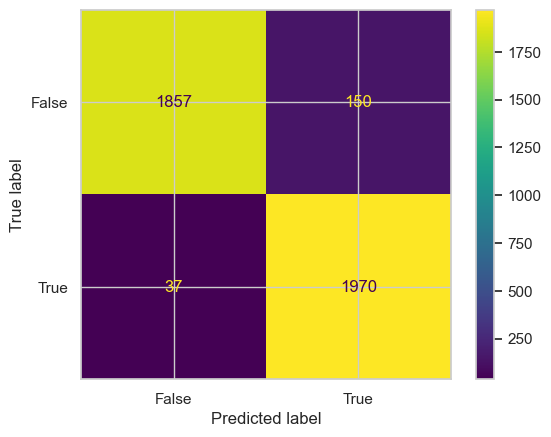

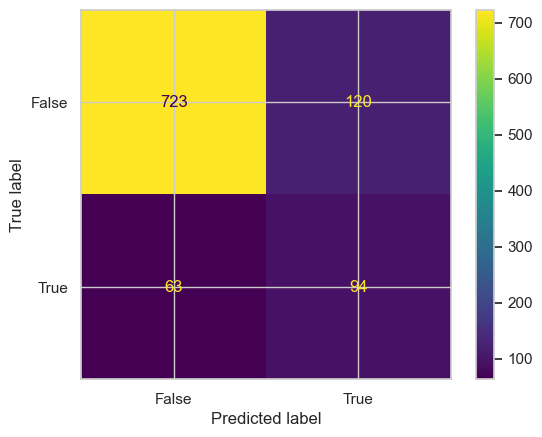

In [95]:
# display confusion matrices from estimators and predictors
conf_matrix(knn);


Based on the evaluation results of the KNN model, the conclusions are:

- `Cross-Validation Score`: The mean recall score obtained from 6-fold cross-validation is approximately 0.90. This indicates that, on average, the KNN model is able to correctly identify around 90.0% of the churned customers in the training data.

- `Accuracy`: The accuracy of the KNN model on the test set is approximately 0.82. This means that the model is able to correctly classify around 82.0% of the customers as either churned or not churned.

- `Precision`: The precision of the KNN model is approximately 0.44. This indicates that when the model predicts a customer as churned, it is correct around 44.0% of the time.

- `Recall`: The recall score of the KNN model is approximately 0.60. This means that the model is able to correctly identify around 60.0% of the churned customers in the test set. It represents the proportion of actual churned customers that were correctly identified by the model.

- `F1-score`: The F1-score of the KNN model is approximately 0.51

# EVALUATION.
### Comparing all the models

In [108]:
#create a function for viewing results
def results(model):

    X2 = X_test_scaled
    y2 = y_test
    
    y2_pred = model.predict(X2)
    
    model_recall = recall_score(y2, y2_pred)
    return model_recall

In [124]:
#create a dataframe to compare the results from each model
recall_scores = pd.DataFrame([
    {"Model": "Logistic_Regresion", "Results": results(base_model)},
    {"Model": "Decision_Tree", "Results": results(tree)},
    {"Model": "Random_Forest", "Results": results(clf)},
    {"Model": "KNN", "Results": results(knn)},
    
])
recall_scores.set_index("Model", inplace=True)
recall_scores.style.format("{:,.3f}")


,Results
Model,
Logistic_Regresion,0.732
Decision_Tree,0.834
Random_Forest,0.344
KNN,0.599


The results from the dataframe above matches the previous indiviadual modeling of each model. The best model from this dataframe is the `Decision tree` with a recall score of 0.834, while the worst model is the Random Forest with a recall score of 0.586. For the Decision Tree, this means that the model is able to correctly identify around 83.0% of the churned customers in the test set. It represents the proportion of actual churned customers that were correctly identified by the model.

### ROC CURVE ANALYSIS

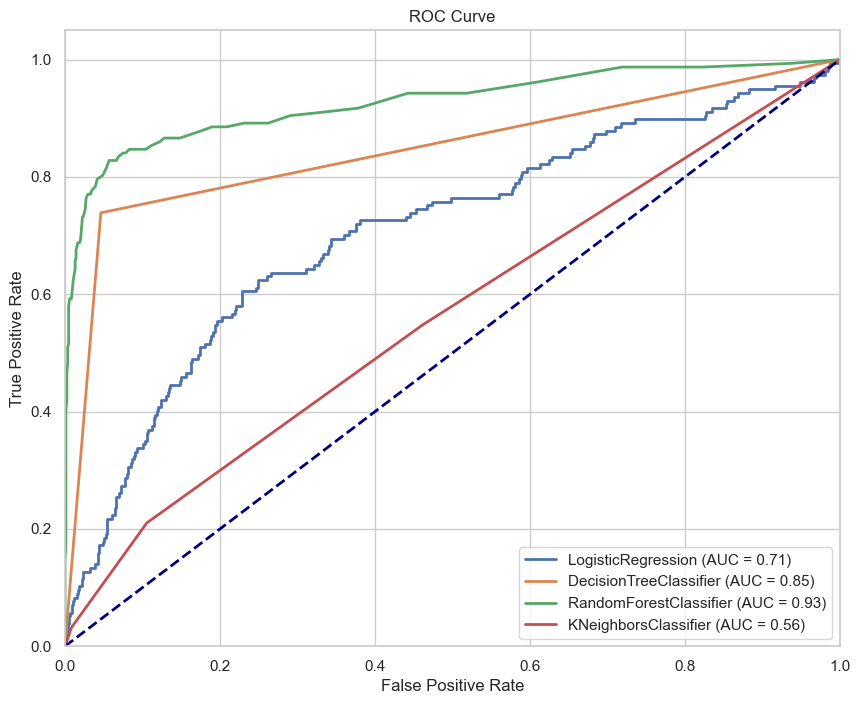

In [115]:
classifiers = [LogisticRegression(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               KNeighborsClassifier()]

#plot ROC curves
plt.figure(figsize=(10, 8))

for clf in classifiers:
    clf_name = clf.__class__.__name__
    
    # Fit the classifier
    clf.fit(X_train, y_train)
    
    # Predict probabilities
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

The best model with the highest AUC is RandomForestClassifier, as it is the curve at the top left corner of the plot. This curve represents the model with the highest True Positive Rate (TPR) for the lowest False Positive Rate (FPR), which corresponds to the highest AUC (Area Under the Curve) of 0.92

# CONCLUSION

`Decision Tree model` is the 'best' model performer among the four models. This would be the best Model for the SyriaTel Telecommunication Company to use to predict which customer will unsubscribe from their services and take precautionary steps to reduce the churn rate.

The 'most' important feature for predicting churn is `total day charge`, which has a score of 0.268983. This means that the amount of money a customer spends on day calls is a strong predictor of whether they will churn. Other important features include `total eve charge, total intl charge, and international plan_yes`. These features all relate to the amount of money a customer spends on their phone service, which is a strong predictor of churn.

The 'least' important features are `account length and number vmail messages`. 



# Submission Details
Student name: Kelsey Maina

Class: Fulltime

Instructor name: Asha Deen/Lucille Kaleha